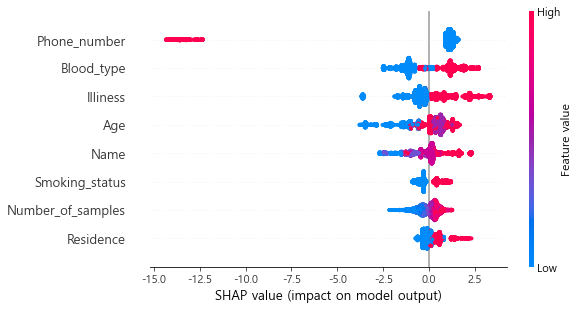

In [33]:
import shap
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

input = pd.read_excel("input_score_last.xlsx")   

y_feature = input['Score']
X_feature = input.drop('Score',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_feature, test_size=0.2, 
random_state =50)

from lightgbm import LGBMRegressor
from matplotlib import font_manager

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
import matplotlib

lgb = LGBMRegressor(random_state=0, n_estimators=500, learning_rate=0.05, max_depth= 15, min_child_samples= 10)
lgb.fit(X_train, y_train)

matplotlib.rcParams['axes.unicode_minus'] = False

plt.clf()
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, show=False)
# shap.summary_plot(shap_values, X_test, plot_type = "bar", show=False)
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[[0]], show=False, matplotlib=True)
plt.savefig("shap2.pdf", format='pdf', dpi=1000, bbox_inches='tight')
